# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [2]:
df_cyber = pd.read_csv("ExportedDatasetsNew/cyberbullying_final2.csv")

### 3.  Check first 10 lines

In [3]:
df_cyber.head(10)

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcakes,0
1,meh p thanks heads concerned another angry dud...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bites kat butt nasty,0
4,rebecca black drops school due bullying,0
5,bully flushes kd,0
6,turkish state killed children last years,0
7,love best response hotcakes managed film nonco...,0
8,twitter basically angry letters generation,0
9,best pick line hi youre cute love people call ...,0


### 4. Identify Dataset & Drop Missing Data

In [4]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61274 entries, 0 to 61273
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          61161 non-null  object
 1   cyberbullying_type  61274 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 957.5+ KB


In [5]:
df_cyber.shape

(61274, 2)

In [6]:
df_cyber.isnull().sum()

tweet_text            113
cyberbullying_type      0
dtype: int64

In [7]:
df_cyber = df_cyber.dropna()

In [8]:
df_cyber.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

### 4.2 Identify & Drop Duplicates

In [9]:
df_cyber.tweet_text.duplicated().sum()

6771

In [10]:
df_cyber.duplicated(subset='tweet_text').sum()

6771

In [11]:
df_cyber.duplicated(subset=['tweet_text','cyberbullying_type']).sum()

4911

In [12]:
df_cyber = df_cyber.drop_duplicates(subset=['tweet_text','cyberbullying_type'])

In [13]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56250 entries, 0 to 61273
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56250 non-null  object
 1   cyberbullying_type  56250 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [14]:
df_cyber['cyberbullying_type'].value_counts()

1    36972
0    19278
Name: cyberbullying_type, dtype: int64

In [15]:
df_cyber.tweet_text.duplicated().sum()

1860

In [16]:
df_cyber.drop_duplicates(keep=False, inplace=True)

In [17]:
df_cyber.duplicated().sum()

0

In [18]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56250 entries, 0 to 61273
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56250 non-null  object
 1   cyberbullying_type  56250 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [19]:
# # Shuffling
# df_cyber = df_cyber.sample(frac=1)
# df_cyber.reset_index(inplace=True)
# df_cyber.drop(["index"], axis=1, inplace=True)

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

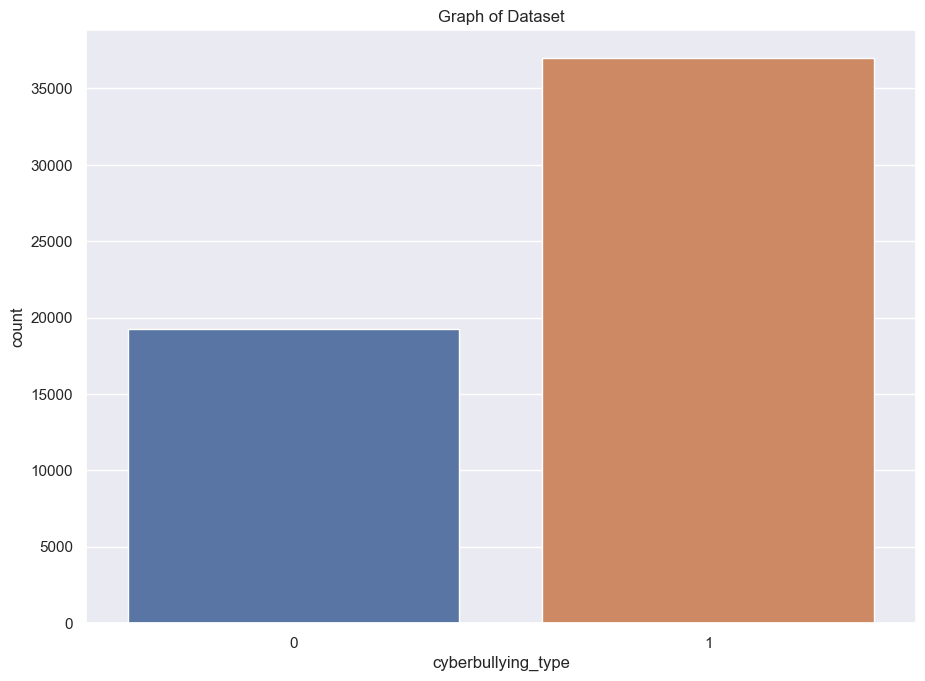

In [20]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=df_cyber).set(title="Graph of Dataset")

### 6 Clean Dataset

In [21]:
def clean_tweets(tweet):
    # remove URL
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove usernames
    tweet = re.sub(r'@[^\s]+[\s]?','',tweet)
    # Remove hashtags
    tweet = re.sub(r'#[^\s]+[\s]?','',tweet)
    # remove special characters
    tweet = re.sub('[^ a-zA-Z0-9]' , '', tweet)
    # remove RT
    tweet = re.sub('RT' , '', tweet)
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)

    return tweet

In [22]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(clean_tweets)
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying_clean2CVLemma.csv', index=False)
df_cyber.head(30)

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcakes,0
1,meh p thanks heads concerned another angry dud...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bites kat butt nasty,0
4,rebecca black drops school due bullying,0
5,bully flushes kd,0
6,turkish state killed children last years,0
7,love best response hotcakes managed film nonco...,0
8,twitter basically angry letters generation,0
9,best pick line hi youre cute love people call ...,0


In [23]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56250 entries, 0 to 61273
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56250 non-null  object
 1   cyberbullying_type  56250 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [24]:
# Identify rows with empty text
empty_rows = df_cyber[df_cyber.applymap(lambda x: x == '').any(axis=1)]

# Remove these rows from the dataset
df_cyber = df_cyber.drop(empty_rows.index)

In [25]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56250 entries, 0 to 61273
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56250 non-null  object
 1   cyberbullying_type  56250 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [26]:
df_cyber.to_csv('ExportedDatasetsNew/cyberbullying_clean_empty2CVLemma.csv', index=False)
df_cyber.head(30)

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcakes,0
1,meh p thanks heads concerned another angry dud...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bites kat butt nasty,0
4,rebecca black drops school due bullying,0
5,bully flushes kd,0
6,turkish state killed children last years,0
7,love best response hotcakes managed film nonco...,0
8,twitter basically angry letters generation,0
9,best pick line hi youre cute love people call ...,0


### 7. Stopwords

In [27]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [28]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
# Download the NLTK resources that are needed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(lambda x: x.lower())

In [31]:
# Initialize the stemmer and the stop words list
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [32]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = text.lower() # Convert to lowercase
    text = [lemma.lemmatize(word) for word in text.split() if word not in stopwords.words('english')] # Remove stopwords
    return " ".join(text)

In [33]:
df_cyber["tweet_text"] = df_cyber["tweet_text"].apply(preprocess_text)

In [34]:
df_cyber.head(30)

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcake,0
1,meh p thanks head concerned another angry dude...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bite kat butt nasty,0
4,rebecca black drop school due bullying,0
5,bully flush kd,0
6,turkish state killed child last year,0
7,love best response hotcake managed film noncom...,0
8,twitter basically angry letter generation,0
9,best pick line hi youre cute love people call ...,0


### 8. Data pre-processing

In [35]:
#f_cyber.dropna(axis = 0)

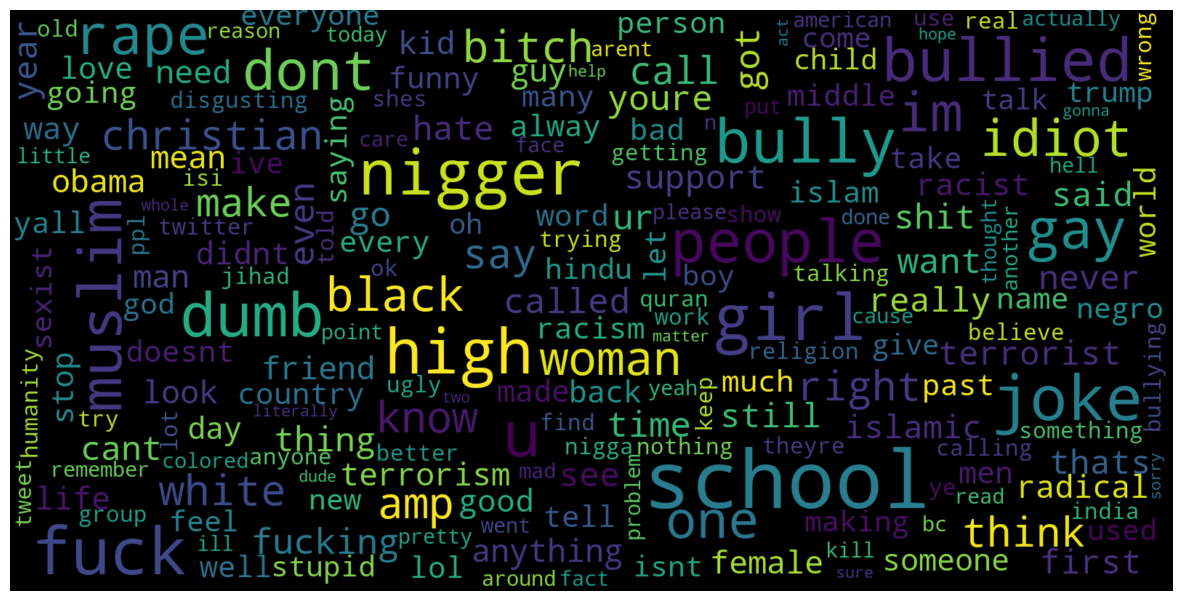

In [36]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

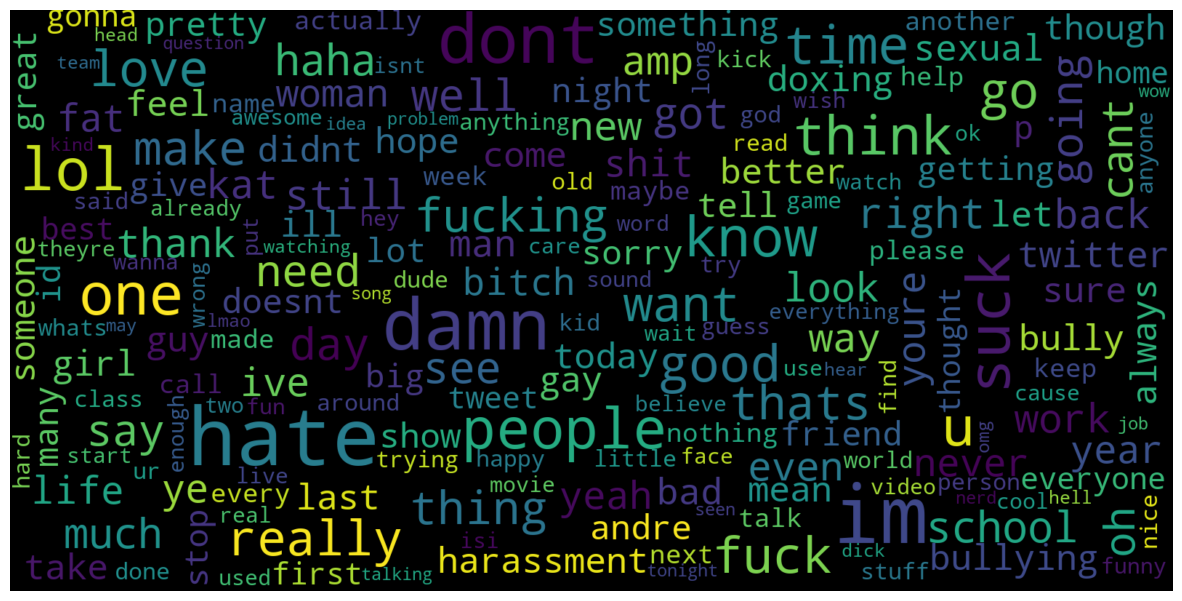

In [37]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

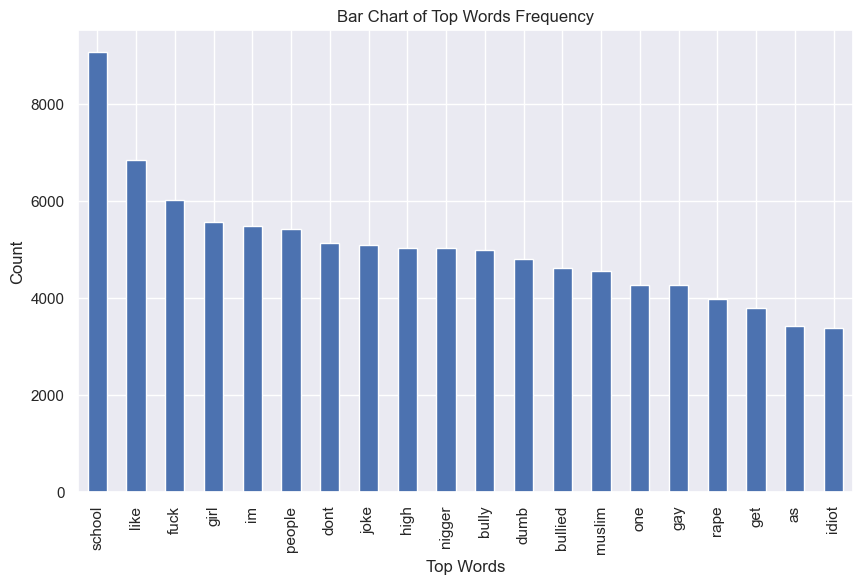

In [38]:


from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_cyber['tweet_text'].astype('U'), 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### 11. Train/Test Splitting

In [39]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df_cyber['tweet_text'],
                                                    df_cyber['cyberbullying_type'],
                                                    test_size=0.2,
                                                    random_state=42)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [40]:
x_train.shape

(45000,)

In [41]:
x_test.shape

(11250,)

In [42]:
y_train.shape

(45000,)

In [43]:
y_test.shape

(11250,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vectorization = CountVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [45]:
print(x_train)

  (0, 23126)	1
  (0, 34697)	1
  (0, 28748)	1
  (0, 6184)	1
  (0, 26067)	1
  (0, 25533)	1
  (0, 11793)	1
  (0, 1037)	1
  (0, 39640)	1
  (1, 24734)	1
  (1, 22105)	1
  (1, 36205)	1
  (1, 22795)	1
  (1, 17762)	1
  (1, 3791)	1
  (1, 30085)	1
  (1, 38066)	1
  (1, 15179)	1
  (1, 34171)	1
  (2, 1499)	1
  (2, 32015)	1
  (2, 10898)	1
  (2, 4084)	1
  (3, 323)	1
  (3, 26030)	2
  :	:
  (44998, 18121)	1
  (44998, 35531)	1
  (44998, 13009)	2
  (44999, 23126)	1
  (44999, 5256)	1
  (44999, 38902)	2
  (44999, 20146)	1
  (44999, 97)	1
  (44999, 16542)	1
  (44999, 15742)	1
  (44999, 29121)	1
  (44999, 18552)	1
  (44999, 6856)	1
  (44999, 38214)	1
  (44999, 6910)	1
  (44999, 16998)	1
  (44999, 25741)	1
  (44999, 28239)	1
  (44999, 16924)	1
  (44999, 6930)	1
  (44999, 33547)	1
  (44999, 25903)	1
  (44999, 1345)	1
  (44999, 37067)	1
  (44999, 17486)	1


In [46]:
print(x_test)

  (0, 4910)	1
  (0, 4949)	1
  (0, 9861)	1
  (0, 9884)	1
  (0, 12959)	1
  (0, 13776)	1
  (0, 18407)	1
  (0, 19242)	1
  (0, 24263)	1
  (0, 25656)	1
  (0, 30270)	1
  (0, 30681)	1
  (0, 34245)	1
  (0, 34462)	1
  (1, 3398)	1
  (1, 4949)	1
  (1, 6505)	1
  (1, 8134)	1
  (1, 8925)	1
  (1, 20152)	1
  (1, 21691)	1
  (1, 23730)	1
  (1, 25730)	1
  (1, 26339)	1
  (1, 26687)	1
  :	:
  (11247, 3889)	1
  (11247, 8743)	1
  (11247, 9293)	1
  (11247, 9517)	1
  (11247, 23867)	1
  (11247, 24269)	1
  (11247, 26030)	1
  (11247, 30270)	1
  (11248, 26687)	1
  (11249, 9215)	1
  (11249, 10248)	1
  (11249, 11723)	1
  (11249, 11828)	1
  (11249, 13124)	1
  (11249, 13153)	1
  (11249, 13547)	1
  (11249, 14724)	2
  (11249, 17957)	1
  (11249, 19311)	1
  (11249, 19567)	1
  (11249, 19568)	1
  (11249, 23867)	1
  (11249, 26253)	1
  (11249, 33662)	1
  (11249, 36341)	1


In [47]:
#Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Initialize the model
svc = SVC()

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Initialize the grid search
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(x_test, y_test)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best score: 0.8373333333333335


### Logistic Regression (LR)

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9149777777777778
0.8442666666666667


C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      4182
           1       0.86      0.90      0.88      7068

    accuracy                           0.84     11250
   macro avg       0.84      0.83      0.83     11250
weighted avg       0.84      0.84      0.84     11250



### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9735333333333334
0.8016888888888889


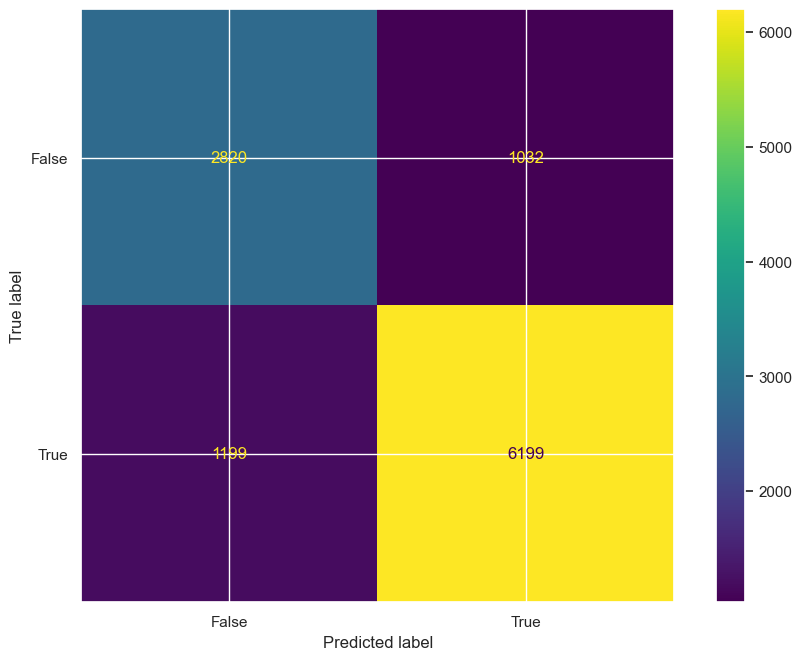

In [51]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [52]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      4019
           1       0.84      0.86      0.85      7231

    accuracy                           0.80     11250
   macro avg       0.79      0.78      0.78     11250
weighted avg       0.80      0.80      0.80     11250



### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9732222222222222
0.8198222222222222


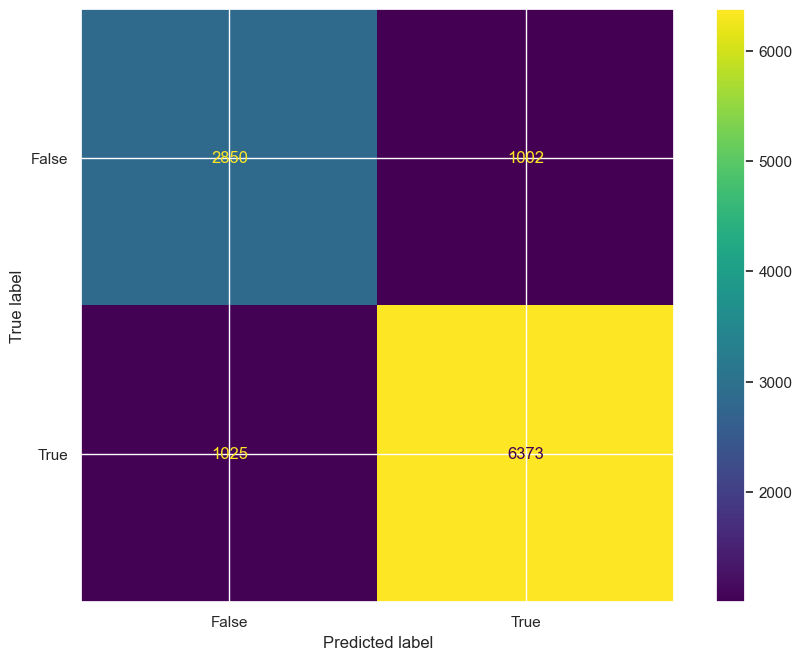

In [54]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [55]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3875
           1       0.86      0.86      0.86      7375

    accuracy                           0.82     11250
   macro avg       0.80      0.80      0.80     11250
weighted avg       0.82      0.82      0.82     11250



### XGBoost

In [56]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)

C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [57]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8603777777777778
0.8489777777777778


In [58]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      4827
           1       0.82      0.94      0.88      6423

    accuracy                           0.85     11250
   macro avg       0.86      0.83      0.84     11250
weighted avg       0.86      0.85      0.85     11250



### Multinomial Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8600444444444444
0.8072888888888888


In [60]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69      3178
           1       0.90      0.82      0.86      8072

    accuracy                           0.81     11250
   macro avg       0.77      0.79      0.78     11250
weighted avg       0.82      0.81      0.81     11250



### Support Vector Machine

In [61]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1)

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9353555555555556
0.8312888888888889


In [62]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      4190
           1       0.85      0.89      0.87      7060

    accuracy                           0.83     11250
   macro avg       0.82      0.81      0.82     11250
weighted avg       0.83      0.83      0.83     11250



### K-Nearest Neighbours

In [63]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.847
0.7486222222222222


In [64]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68      4954
           1       0.73      0.86      0.79      6296

    accuracy                           0.75     11250
   macro avg       0.76      0.73      0.74     11250
weighted avg       0.75      0.75      0.74     11250



### Bagging Decision Tree (Ensemble Learning I)

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.7,max_features=1.0,n_estimators=30)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9601777777777778
0.8216


In [66]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3873
           1       0.86      0.87      0.86      7377

    accuracy                           0.82     11250
   macro avg       0.80      0.80      0.80     11250
weighted avg       0.82      0.82      0.82     11250



### Boosting Decision Tree (Ensemble Learning II)

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=1,max_depth=5),n_estimators=40,learning_rate=0.5)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8619555555555556
0.8448888888888889


In [68]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      4783
           1       0.82      0.94      0.87      6467

    accuracy                           0.84     11250
   macro avg       0.86      0.83      0.84     11250
weighted avg       0.85      0.84      0.84     11250



In [70]:
user = input("Enter a text: ")
data = vectorization.transform([user]).toarray()
output = model.predict(data)
print(output)

[1]
